In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
csv_path = "../Dataset_CSV/online_sales_dataset.csv"
df = pd.read_csv(csv_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [2]:
num_rows = len(df)
num_rows

49782

In [3]:
df_cleaned = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [4]:
#remove negatives for important quantitative columns
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
len(df)

47293

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


In [6]:
#check for negative values in important columns
negative_values_df = df_cleaned[
    (df_cleaned["ShippingCost"] < 0) |
    (df_cleaned["Discount"] < 0) |
    (df_cleaned["UnitPrice"] < 0)
]

negative_values_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority


In [7]:
df = df.dropna(subset=["CustomerID"])
len(df)

44804

In [8]:
# Drop rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')

In [9]:
# Count the number of rows where ReturnStatus is "Returned"
returned_count = len(df[df["ReturnStatus"] == 1])
returned_count


0

C:\Users\Seth\AppData\Local\Temp\ipykernel_28200\2716110172.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index, palette="magma")


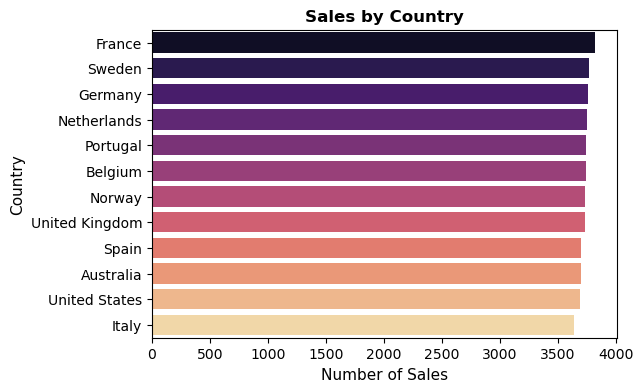

In [10]:
# Make a plot of the Sales, sorted by country
plt.figure(figsize=(6,4))

sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index, palette="magma")
plt.title("Sales by Country", fontsize=12, weight='bold')
plt.xlabel("Number of Sales", fontsize=11)
plt.ylabel("Country", fontsize=11)

plt.savefig("../Images/sales_by_country.png", dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Seth\AppData\Local\Temp\ipykernel_28200\1874189172.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Category", palette="magma", order=df["Category"].value_counts().index)


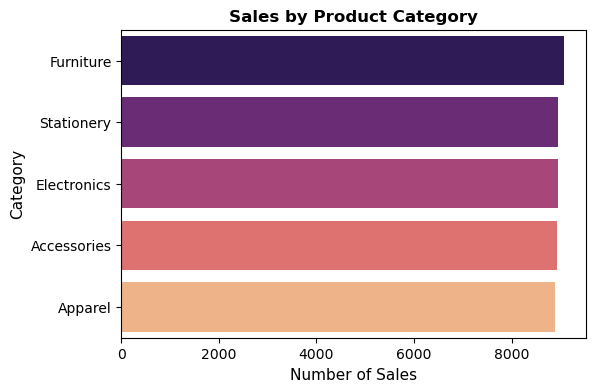

In [11]:
# Make a plot of the sales, sorted by category
plt.figure(figsize=(6,4))

sns.countplot(data=df, y="Category", palette="magma", order=df["Category"].value_counts().index)
plt.title("Sales by Product Category", fontsize=12, weight='bold')
plt.xlabel("Number of Sales", fontsize=11)
plt.ylabel("Category", fontsize=11)

plt.savefig("../Images/sales_by_product_category.png", dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Seth\AppData\Local\Temp\ipykernel_28200\639470459.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="magma")


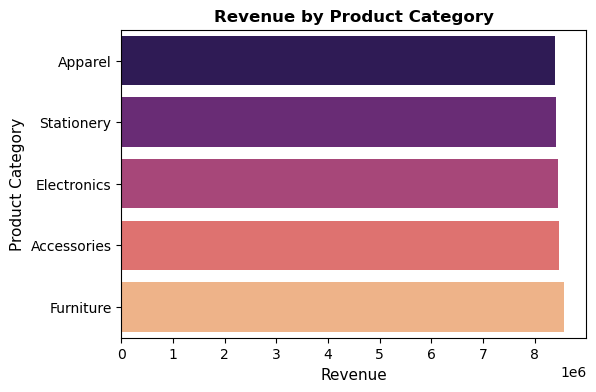

In [12]:
# Make of plot of revenue, sorted by category
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
revenue_by_category = df.groupby("Category")["TotalRevenue"].sum().sort_values()

plt.figure(figsize=(6,4))

sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="magma")
plt.title("Revenue by Product Category", fontsize=12, weight='bold')
plt.xlabel("Revenue", fontsize=11)
plt.ylabel("Product Category", fontsize=11)

plt.savefig("../Images/revenue_by_product_category.png", dpi=300, bbox_inches='tight')

plt.show()

In [13]:
########################################################################
# Begin prep for Machine Learning
########################################################################

In [14]:
# Drop rows with missing CustomerID (since it's crucial for tracking churn)

# Drop unnecessary columns that are not useful for churn prediction
columns_to_drop = ["InvoiceNo", "StockCode", "Description"]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Fill missing values for categorical columns with 'Unknown'
categorical_cols = ["Country", "PaymentMethod", "SalesChannel", "ReturnStatus", "ShipmentProvider", "WarehouseLocation", "OrderPriority"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoders for later use

# Create a SQLite database and save the cleaned data
cleaned_db_path = "../Dataset_CSV/cleaned_sales_data.db"
conn = sqlite3.connect(cleaned_db_path)

df.to_sql("sales_cleaned", conn, if_exists="replace", index=False)

df.head()


,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalRevenue
0,38,2020-01-01 00:00:00,1.71,37039.0,0,0.47,0,10.79,Apparel,0,0,3,2,2,34.4394
1,18,2020-01-01 01:00:00,41.25,19144.0,8,0.19,2,9.51,Electronics,1,0,3,4,2,601.4250
2,49,2020-01-01 02:00:00,29.11,50472.0,3,0.35,0,23.03,Electronics,1,1,3,1,0,927.1535
3,14,2020-01-01 03:00:00,76.68,96586.0,5,0.14,2,11.08,Accessories,1,0,2,4,1,923.2272
5,47,2020-01-01 05:00:00,70.16,53887.0,9,0.48,1,13.98,Electronics,1,0,0,2,2,1714.7104


In [15]:
###############################################
# Machine Learning: Customer Churn  Prediction
###############################################

# Reload cleaned data
conn = sqlite3.connect(cleaned_db_path)
query = """
SELECT CustomerID, SUM(Quantity * UnitPrice) AS TotalSpent, COUNT(DISTINCT InvoiceDate) AS PurchaseFrequency, 
       AVG(UnitPrice) AS AvgSpentPerItem, COUNT(*) AS TotalItemsBought,
       MAX(InvoiceDate) AS LastPurchaseDate
FROM sales_cleaned
GROUP BY CustomerID;
"""
df = pd.read_sql(query, conn)

# Convert InvoiceDate to datetime and calculate days since last purchase
df["LastPurchaseDate"] = pd.to_datetime(df["LastPurchaseDate"])
df["DaysSinceLastPurchase"] = (pd.to_datetime("2025-03-13") - df["LastPurchaseDate"]).dt.days

# Define churn (customers with no purchase in the last 90 days)
df["Churn"] = (df["DaysSinceLastPurchase"] > 90).astype(int)

# Drop unnecessary columns
churn_df = df.drop(columns=["CustomerID", "LastPurchaseDate", "DaysSinceLastPurchase"])

# Scale numerical features
#scaler = StandardScaler()
#num_cols = ["TotalSpent", "PurchaseFrequency", "AvgSpentPerItem", "TotalItemsBought"]
#df[num_cols] = scaler.fit_transform(churn_df[num_cols])

# Split into training and testing sets
X = churn_df.drop(columns=["Churn"])
y = churn_df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(classification_rep)



Model Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.19      0.08      0.12      1110
           1       0.85      0.93      0.89      5968

    accuracy                           0.80      7078
   macro avg       0.52      0.51      0.50      7078
weighted avg       0.74      0.80      0.77      7078



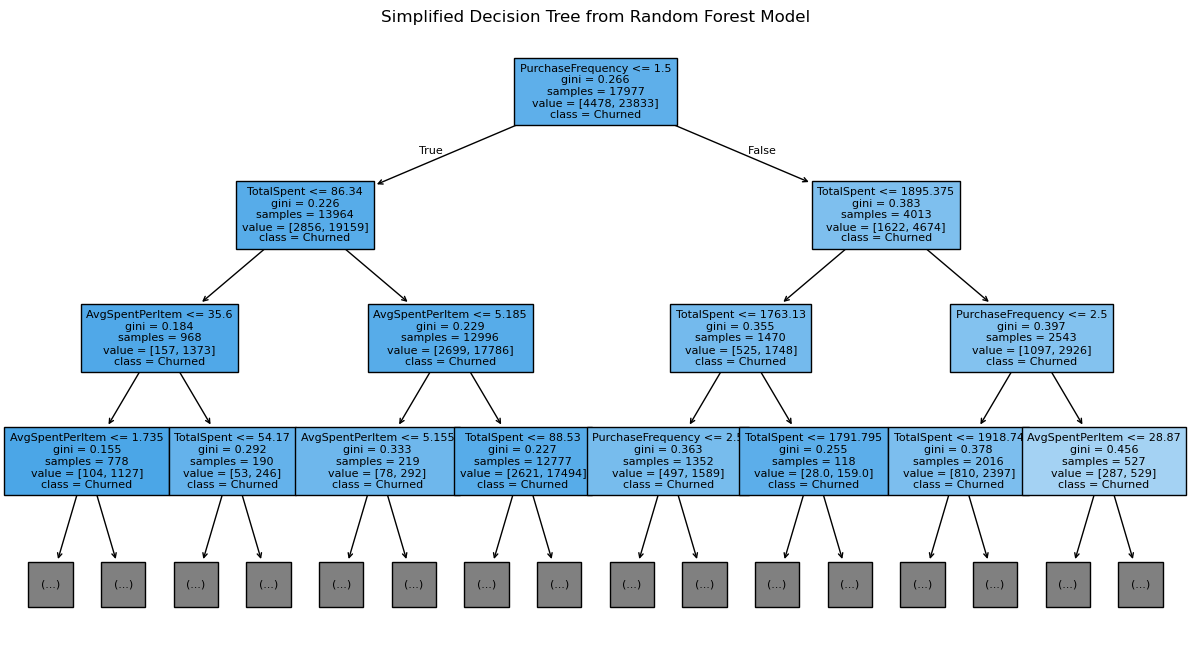

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Reduce the depth of the tree for better readability
plt.figure(figsize=(15, 8))
plot_tree(model.estimators_[0], 
          filled=True, 
          feature_names=X.columns, 
          class_names=["Not Churned", "Churned"], 
          fontsize=8, 
          max_depth=3)  # Limit the depth for clarity
plt.title("Simplified Decision Tree from Random Forest Model")
plt.show()


C:\Users\Seth\AppData\Local\Temp\ipykernel_28200\1259995913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette=["Purple", "Pink"])


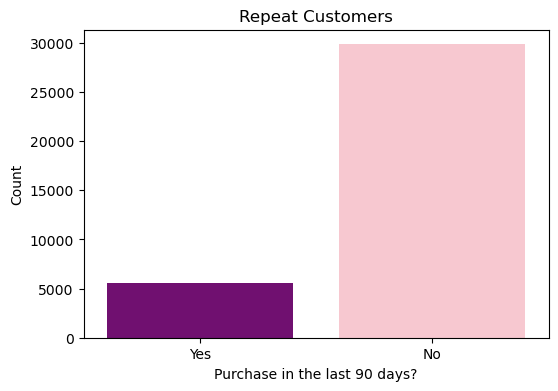

In [21]:
# Count plot of churned vs. non-churned customers
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Churn"], palette=["Purple", "Pink"])
plt.xticks(ticks=[0, 1], labels=["Yes", "No"])
plt.title("Repeat Customers")
plt.xlabel("Purchase in the last 90 days?")
plt.ylabel("Count")

plt.savefig("../Images/repeat_customers.png", dpi=300)

plt.show()


In [ ]:
# Get feature importance from the model
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="magma")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Churn Prediction")
plt.show()


In [ ]:
# Summary Report
print("Churn Prediction Results:")
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)

# Customer insights
total_customers = len(df)
churned_customers = df["Churn"].sum()
not_churned = total_customers - churned_customers
churn_rate = churned_customers / total_customers * 100

print("\nChurn Insights:")
print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers} ({churn_rate:.2f}%)")
print(f"Active Customers: {not_churned} ({100 - churn_rate:.2f}%)")


In [ ]:
# Segment churned customers to find deeper patterns

# Separate churned and active customers
churned_customers = df[df["Churn"] == 1]
active_customers = df[df["Churn"] == 0]

# Compare average spending habits
churn_vs_active = pd.DataFrame({
    "Metric": ["TotalSpent", "PurchaseFrequency", "AvgSpentPerItem", "TotalItemsBought"],
    "Churned Avg": churned_customers[["TotalSpent", "PurchaseFrequency", "AvgSpentPerItem", "TotalItemsBought"]].mean().values,
    "Active Avg": active_customers[["TotalSpent", "PurchaseFrequency", "AvgSpentPerItem", "TotalItemsBought"]].mean().values
})

# Display segmented churn insights
print("Churn vs Active Customer Insights:\n")
print(churn_vs_active)


In [ ]:
churn_vs_active_long = churn_vs_active.melt(id_vars=["Metric"], 
                                            value_vars=["Churned Avg", "Active Avg"], 
                                            var_name="Customer Type", 
                                            value_name="Average Value")
# Set up the figure
plt.figure(figsize=(10, 5))
sns.barplot(x="Metric", y="Churned Avg", data=churn_vs_active, color="purple", label="Churned Customers")
#sns.barplot(x="Metric", y="Churned Avg", data=churn_vs_active, hue= "Customer Type")
sns.barplot(x="Metric", y="Active Avg", data=churn_vs_active, color="pink", alpha=0.6, label="Active Customers")

# Labels and title
plt.xlabel("Customer Metrics")
plt.ylabel("Average Value")
plt.title("Comparison of Churned vs. Active Customers")
plt.legend()
plt.xticks(rotation=20)
plt.show()


In [ ]:
###############################################
# Machine Learning: Purchase Return Prediction
###############################################

#Load data from SQLite database
db_path = "../Dataset_CSV/cleaned_sales_data.db"  # Ensure this matches your file path
conn = sqlite3.connect(db_path)

query = """
SELECT Quantity, UnitPrice, Discount, ShippingCost, Country, PaymentMethod, 
       SalesChannel, Category, ShipmentProvider, WarehouseLocation, ReturnStatus
FROM sales_cleaned
"""
df = pd.read_sql(query, conn)

# Encode categorical variables
categorical_cols = ["Country", "PaymentMethod", "SalesChannel", "Category", "ShipmentProvider", "WarehouseLocation"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

# Split dataset
X = df.drop(columns=["ReturnStatus"])
y = df["ReturnStatus"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train.iloc[:, :4] = scaler.fit_transform(X_train.iloc[:, :4])
X_test.iloc[:, :4] = scaler.transform(X_test.iloc[:, :4])

print("Data preprocessing complete.")

In [ ]:
# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)


In [ ]:
# Get feature importance from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="magma")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Purchase Returns")
plt.show()

In [ ]:
# Group by category and calculate return percentage
category_returns = df.groupby("Category")["ReturnStatus"].mean().reset_index()
category_returns["ReturnStatus"] *= 100  # Convert to percentage

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="ReturnStatus", data=category_returns, palette="magma")
plt.xlabel("Product Category")
plt.ylabel("Return Rate (%)")
plt.title("Return Rate by Product Category")
plt.xticks(rotation=20)

plt.savefig("../Images/return_rate_by_category.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Group by discount ranges and calculate return rate
df["DiscountRange"] = pd.qcut(df["Discount"], q=5, labels=["Lowest", "Low", "Medium", "High", "Highest"])
discount_returns = df.groupby("DiscountRange")["ReturnStatus"].mean().reset_index()
discount_returns["ReturnStatus"] *= 100  # Convert to percentage

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="DiscountRange", y="ReturnStatus", data=discount_returns, palette="magma")
plt.xlabel("Discount Level")
plt.ylabel("Return Rate (%)")
plt.title("Return Rate by Discount Level")

plt.savefig("../Images/return_rate_by_discount.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Group by Quantity ranges and calculate return rate
df["QuantityRange"] = pd.qcut(df["Quantity"], q=5, labels=["Smallest", "Small", "Medium", "Large", "Largest"])
quantity_returns = df.groupby("QuantityRange")["ReturnStatus"].mean().reset_index()
quantity_returns["ReturnStatus"] *= 100  # Convert to percentage

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="QuantityRange", y="ReturnStatus", data=quantity_returns, palette="magma")
plt.xlabel("Order Size")
plt.ylabel("Return Rate (%)")
plt.title("Return Rate by Order Size")

plt.savefig("../Images/return_rate_by_order_size.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Group by ShipmentProvider and calculate return rate
shipping_returns = df.groupby("ShipmentProvider")["ReturnStatus"].mean().reset_index()
shipping_returns["ReturnStatus"] *= 100  # Convert to percentage

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="ShipmentProvider", y="ReturnStatus", data=shipping_returns, palette="magma")
plt.xlabel("Shipment Provider")
plt.ylabel("Return Rate (%)")
plt.title("Return Rate by Shipping Provider")
plt.xticks(rotation=20)

plt.savefig("../Images/return_rate_by_shipping.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
########################################################
# Machine Learning: Sales Trends
########################################################
import pandas as pd
import numpy as np
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from SQLite database
db_path = "../Dataset_CSV/cleaned_sales_data.db"
conn = sqlite3.connect(db_path)

query = """
SELECT CustomerID, 
       SUM(Quantity * UnitPrice) AS TotalSpent, 
       COUNT(DISTINCT InvoiceDate) AS PurchaseFrequency, 
       AVG(UnitPrice) AS AvgSpentPerItem, 
       COUNT(*) AS TotalItemsBought
FROM sales_cleaned
GROUP BY CustomerID;
"""

df = pd.read_sql(query, conn)

# Drop CustomerID (not useful for clustering)
df = df.drop(columns=["CustomerID"])

# Scale numerical features for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print("Data Preprocessing Complete.")


In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 3  # Adjust based on elbow curve result

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

print("Customers Successfully Clustered!")


In [ ]:
import pandas as pd
import sqlite3

# Load sales data from database
db_path = "../Dataset_CSV/cleaned_sales_data.db"
conn = sqlite3.connect(db_path)

query = """
SELECT Category, SUM(Quantity) AS TotalSales, COUNT(DISTINCT InvoiceDate) AS PurchaseFrequency,
       AVG(UnitPrice) AS AvgPrice, AVG(Discount) AS AvgDiscount, MAX(InvoiceDate) AS LastSaleDate
FROM sales_cleaned
GROUP BY Category;
"""
df = pd.read_sql(query, conn)

# Convert InvoiceDate to datetime
df["LastSaleDate"] = pd.to_datetime(df["LastSaleDate"])

# Define recent vs. past sales (Last 30 days vs. Before that)
cutoff_date = df["LastSaleDate"].max() - pd.Timedelta(days=120)
df["RecentSales"] = df.apply(lambda row: row["TotalSales"] if row["LastSaleDate"] > cutoff_date else 0, axis=1)
df["PastSales"] = df["TotalSales"] - df["RecentSales"]

# Define trending items (Products with >20% growth)
df["Trending"] = (df["RecentSales"] > df["PastSales"] * 1.05).astype(int)  # 5% Growth

print("Data Preparation Complete")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode category labels
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

# Select features and target
X = df[["PurchaseFrequency", "AvgPrice", "AvgDiscount", "TotalSales"]]
y = df["Trending"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


In [ ]:
query = """
SELECT Category, SUM(Quantity) AS TotalSales, strftime('%Y-%m', InvoiceDate) AS SalesMonth
FROM sales_cleaned
GROUP BY Category, SalesMonth
ORDER BY SalesMonth DESC, TotalSales DESC;
"""
df_trends = pd.read_sql(query, conn)

df_trends = df_trends[df_trends["SalesMonth"] != "2025-09"]

# Visualize trends
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x="SalesMonth", y="TotalSales", hue="Category", data=df_trends, marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trends by Category")
plt.legend(title="Category")

plt.savefig("../Images/monthly_sales_trends.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
query = """
SELECT Category, SUM(Quantity) AS TotalSales, strftime('%m', InvoiceDate) AS SalesMonth
FROM sales_cleaned
GROUP BY Category, SalesMonth;
"""
df_seasonal = pd.read_sql(query, conn)

df_trends = df_trends[df_trends["SalesMonth"] != "2025-09"]

# Convert SalesMonth to integer for sorting
df_seasonal["SalesMonth"] = df_seasonal["SalesMonth"].astype(int)

# Pivot table for heatmap
df_pivot = df_seasonal.pivot(index="Category", columns="SalesMonth", values="TotalSales")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap="magma", annot=True, fmt=".0f")
plt.xlabel("Month")
plt.ylabel("Category")
plt.title("Seasonal Sales Trends by Category")

plt.savefig("../Images/seasonal_sales_trends.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
query = """
SELECT Category, SUM(Quantity) AS TotalSales
FROM sales_cleaned
GROUP BY Category
ORDER BY TotalSales DESC;
"""
df_best_sellers = pd.read_sql(query, conn)

# Bar Chart of Best-Selling Categories
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="TotalSales", data=df_best_sellers, palette="magma")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Best-Selling Product Categories")
plt.xticks(rotation=45)



plt.show()


In [ ]:
query = """
SELECT Category, SUM(Quantity) AS TotalSales, strftime('%Y-%m', InvoiceDate) AS SalesMonth
FROM sales_cleaned
GROUP BY Category, SalesMonth
ORDER BY SalesMonth ASC;
"""
df_growth = pd.read_sql(query, conn)

df_growth = df_growth[df_growth["SalesMonth"] != "2025-09"]

# Line Chart of Growth Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="SalesMonth", y="TotalSales", hue="Category", data=df_growth, marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Growth Over Time by Category")
plt.legend(title="Category")
plt.show()


In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
db_path = "../Dataset_CSV/cleaned_sales_data.db"
conn = sqlite3.connect(db_path)

# Load sales data
query = "SELECT UnitPrice, ReturnStatus FROM sales_cleaned"
df = pd.read_sql(query, conn)


In [ ]:
# Group data into price categories
df["PriceCategory"] = pd.qcut(df["UnitPrice"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Calculate return rates for each price category
price_returns = df.groupby("PriceCategory")["ReturnStatus"].mean().reset_index()
price_returns["ReturnRate (%)"] = price_returns["ReturnStatus"] * 100  # Convert to percentage

# Display results
print(price_returns)


In [ ]:
df = pd.read_csv(csv_path)
df.head()